 # PROJECT -1 :-  MALL CUSTOMERS
# Step-1 Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/DATA SCIENCE/0. Data Science _All_resources/All_resources/PDFs/Machine Learning/Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Step-2 CHECK NULL VALUE AND UNIQUE VALUE

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
print(df['Annual Income (k$)'].unique())
print(df['Spending Score (1-100)'].unique())
print(df['Age'].unique())

[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]


 THERE IS NO NULL VALUE. WE CAN PROCEED FURTHER

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Step-3 CHECK IF THERE IS ANY RELATIONSHIP BETWEEN DIFFERENT COLUMNS

In [7]:
Df_male= df.loc[df['Genre']=='Male']
Df_female=df.loc[df['Genre']=='Female']

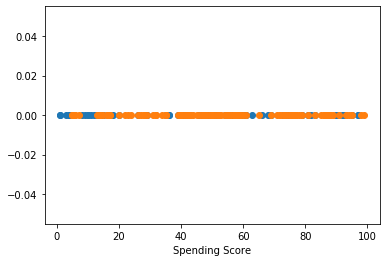

In [8]:
plt.plot(Df_male['Spending Score (1-100)'],np.zeros_like(Df_male['Spending Score (1-100)']),"o")
plt.plot(Df_female['Spending Score (1-100)'],np.zeros_like(Df_female['Spending Score (1-100)']),"o")
plt.xlabel("Spending Score")
plt.show()

 THere is lot of overlapping so it is difficult to conclude that which category i.e Male or Female,was the most spending category.


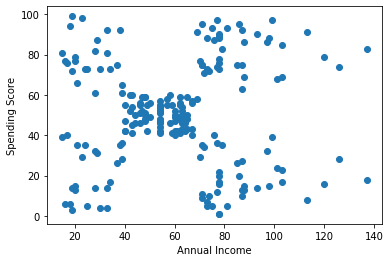

In [9]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"], cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


 this graph does not show the clear realtionship btw Annual income and spending score

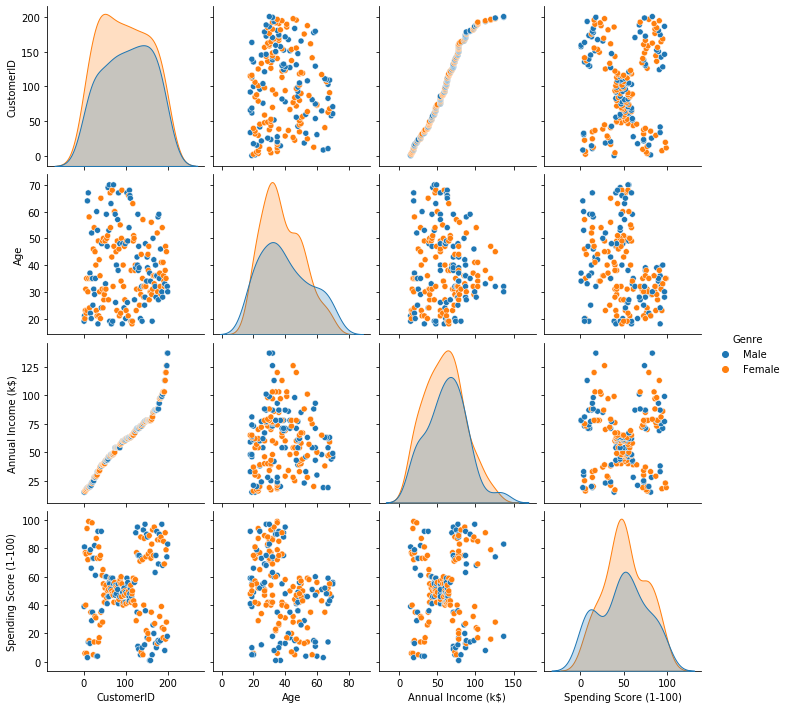

In [10]:
x=sns.pairplot(df, hue="Genre")

# Analysis Done on Multiple Graphs

 1) From age 20 to nearly 40 are with high Spending Score.
 2) Annual income doesnot have much effect on spending score.
 3) Female are the one's with higher spending score.

In [11]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
# Check Correlation
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


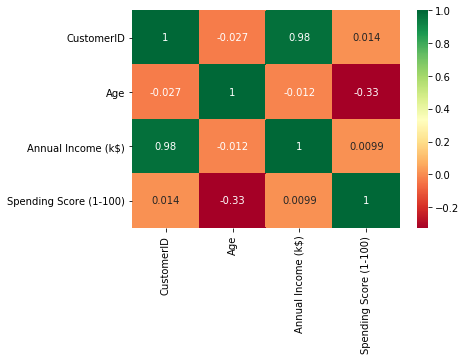

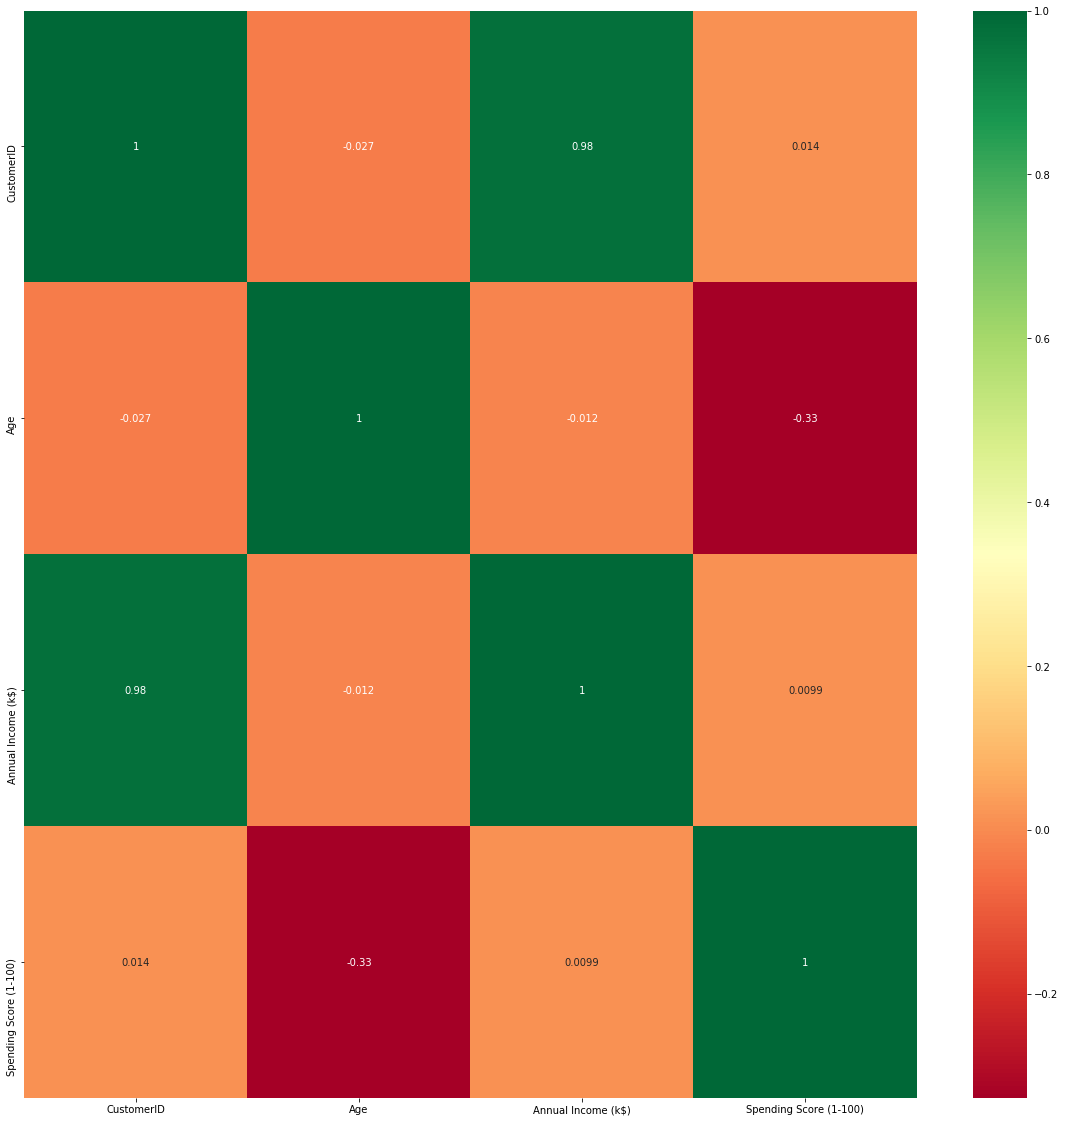

In [13]:
sns.heatmap(df.corr(),  annot=True,cmap="RdYlGn")
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
corrmat=df.corr() 
top_corr_features=corrmat.index
top_corr_features

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

 Conclusion from Heatmap
 spending Score has negative correlation with Genre and Age but has positive correlation of approx 1% with annual income.
 Dark Green is Highly positive Correlated and Red is Negatively Correlated

# Step-4 use Labele encoding Male-1, Female=0

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Genre=le.fit_transform(df.Genre)

In [16]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Step- 5 Use K-mean 

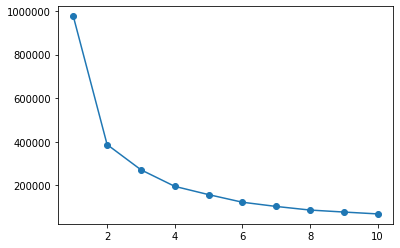

In [17]:
# import KMeans file
from sklearn.cluster import KMeans

#Count Optimal of Clusters USing Elbow Method
kmodel= KMeans()
d=[]
for i in range(1,11):
    kmodel=KMeans(i)
    kmodel.fit(df)
    d.append(kmodel.inertia_)
plt.plot(range(1,11),d,marker='o')

Through this graph we can conclude that the ideal no. of cluster for this problem will either be 4 or 5.

In [18]:
# Create Object
kmodel=KMeans(5)
# Fit Model
kmodel.fit(df)

kmodel.labels_
df["cluster"]=kmodel.labels_
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


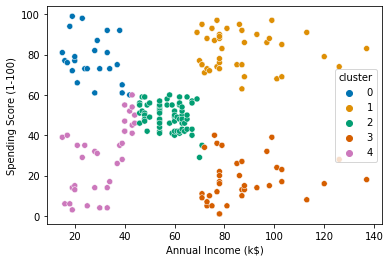

In [19]:
sns.scatterplot(data=df,x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette='colorblind',legend='full')

In [20]:
Group_Cluster=df.groupby("cluster")

 From above it is clear tha cluster 4 are the customers with best purchasing capacity as there annual income and spending score is higher as compared to other.
 After cluster 4, Cluster 3 customers have good purchasing capacity as there spending score is almost similar to cluster 4 customers but there annual income is very low.
 Last is cluster 2 which consists of customers with moderate purchasing capacity as their spending score and annual income is at mediocre level as compared to other customers on the data.
 

# CUSTOMERS WITH BEST PURCHASING CAPACITY

In [21]:
BEST=Group_Cluster.get_group(4).mean()
BEST

CustomerID                32.558824
Genre                      0.352941
Age                       45.088235
Annual Income (k$)        31.382353
Spending Score (1-100)    29.852941
cluster                    4.000000
dtype: float64

# CUSTOMERS WITH GOOD PURCHASING CAPACITY

In [22]:
Good=Group_Cluster.get_group(3)
Good

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
128,129,1,59,71,11,3
130,131,1,47,71,9,3
132,133,0,25,72,34,3
134,135,1,20,73,5,3
136,137,0,44,73,7,3
138,139,1,19,74,10,3
140,141,0,57,75,5,3
142,143,0,28,76,40,3
144,145,1,25,77,12,3
146,147,1,48,77,36,3


In [27]:
Good.mean()

CustomerID                164.000000
Genre                       0.527778
Age                        40.805556
Annual Income (k$)         87.916667
Spending Score (1-100)     17.888889
cluster                     3.000000
dtype: float64

# CUSTOMER WITH MODERATE PURCHASING CAPACITY

In [24]:
Moderate=Group_Cluster.get_group(2)
Moderate

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
58,59,0,27,46,51,2
59,60,1,53,46,46,2
60,61,1,70,46,56,2
61,62,1,19,46,55,2
62,63,0,67,47,52,2
...,...,...,...,...,...,...
120,121,1,27,67,56,2
121,122,0,38,67,40,2
122,123,0,40,69,58,2
124,125,0,23,70,29,2
